# Sports articles for objectivity analysis

# Project Description
The objective of this project is to apply machine learning models and algorithms
related to supervised learning, in our caso in relation to Sports articles for objectivity analysis.

In [474]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# Data pre-processing
### Checking the data
Before we start to use the dataset, we need to check if its in a proper shape, if it does not have many missing values, etc.

In [475]:
import os
#data_set = pd.read_excel(os.getcwd() + "../SportsArticles/features.xls")
data_set = pd.read_csv('../SportsArticles/features.csv')
data_set.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,JJR,JJS,LS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TOs,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,baseform,Quotes,questionmarks,exclamationmarks,fullstops,commas,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109,0,1,7,9,0,5,8,6,0,0,0,0,29,0,0,12,0,0,1,2,2,0,0,2,0,3,0,0,11,0,2,0,0,0,1,0,1,0,2,0,0,0,4,2,0,0,0,0,0,3,0,11,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309,21,4,1,19,1,4,35,23,0,0,0,2,93,1,0,17,0,0,7,5,16,0,0,0,1,3,0,0,13,7,13,9,14,0,0,0,3,0,8,7,0,0,19,3,0,5,0,1,0,10,0,13,0,14,9,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149,6,1,8,14,0,5,15,11,0,0,0,0,47,1,0,4,0,0,4,0,7,0,0,1,0,4,0,0,8,2,2,2,3,0,0,0,2,0,4,0,0,0,6,3,0,0,0,0,0,2,0,8,0,3,2,1,1,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305,18,5,7,26,0,10,37,21,1,1,0,0,83,2,0,18,0,0,6,2,9,1,0,1,2,9,0,1,13,12,6,1,7,1,1,0,1,0,5,3,0,0,13,17,0,0,0,0,0,8,3,13,1,7,1,1,1,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491,23,8,33,47,0,12,61,36,0,1,0,2,142,1,0,15,0,0,7,9,10,1,0,1,0,13,0,1,34,5,6,6,5,0,3,0,1,0,7,4,0,0,18,17,0,0,0,0,0,16,2,34,1,5,6,1,1,24


In [476]:
data_set.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,JJR,JJS,LS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TOs,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,baseform,Quotes,questionmarks,exclamationmarks,fullstops,commas,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,1.901000,0.018000,7.139000,147.103000,3.152000,0.0,39.114000,0.387000,2.190000,25.001000,10.338000,31.319000,0.964000,0.398000,3.351000,1.919000,16.539000,0.058000,4.380000,29.945000,13.577000,12.785000,11.903000,17.13100,2.5470,3.673000,0.099000,3.461000,0.0,20.592000,3.785000,1.040000,0.21000,34.941000,28.633000,0.30200,1.618000,0.003000,4.316000,2.70100,19.187000,5.419000,29.942000,4.389000,17.124000,11.899000,0.927000,0.995000,19.142000
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,2.391426,0.248471,8.051118,100.769335,3.097821,0.0,32.568539,0.797413,4.626154,24.400336,9.589772,29.145475,1.394507,0.841608,3.453364,3.206668,13.350682,0.269646,5.120529,25.223723,11.433932,10.930977,12.353469,17.80789,2.9561,3.993748,0.351173,4.056221,0.0,18.000043,5.219005,2.203464,0.85594,26.826987,27.349302,1.13582,3.191906,0.094868,6.586313,4.81069,16.756754,5.811989,25.226752,5.126008,17.811285,12.356354,0.260267,0.070569,6.632483
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,0.000000,0.000000,1.000000,74.000000,1.000000,0.0,14.000000,0.000000,0.000000,6.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,1.000000,11.000000,5.000000,5.000000,3.000000,4.00000,0.0000,1.000000,0.000000,1.000000,0.0,6.000000,0.000000,0.000000,0.00000,14.000000,9.000000,0.00000,0.000000,0.000000,0.000000,0.00000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,1.000000,0.000000,4.000000,133.500000,2.000000,0.0,32.500000,0.000000,0.000000,17.000000,8.000000,24.000000,0.000000,0.000000,2.000000,0.000000,14.000000,0.000000,3.000000,24.000000,11.000000,10.000000,8.000000,11.00000,2.0000,2.000000,0.000000,2.000000,0.0,17.000000,1.000000,0.000000,0.00000,31.000000,23.000000,0.00000,1.000000,0.000000,2.000000,1.00000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000,18.000000
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,3.000000,0.000000,10.000000,189.250000,5.000000,0.0,55.000000,1.000000,3.000000,39.000000,15.000000,47.0

### Checking for missing values
One of the problems that can ocurr often is empty values in the data set. So we are going to verify is there are any empty values.


In [477]:
data_set.isna().sum()

TextID              0
URL                 0
Label               0
totalWordsCount     0
semanticobjscore    0
                   ..
present3rd          0
present1st2nd       0
sentence1st         0
sentencelast        0
txtcomplexity       0
Length: 62, dtype: int64

The data set is complete

In [478]:
""" %matplotlib inline
sb.pairplot(data_set.sample(100), hue='Label') """

" %matplotlib inline\nsb.pairplot(data_set.sample(100), hue='Label') "

### Analysing the data


Text(0, 0.5, 'Frequency')

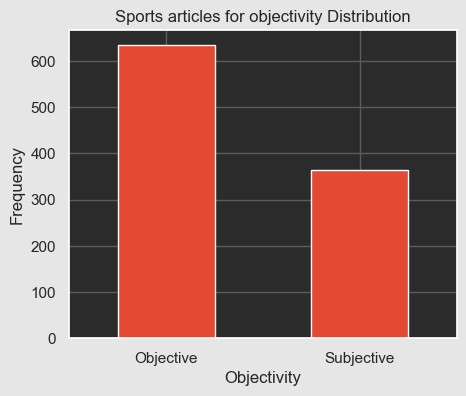

In [479]:
count_objective = pd.value_counts(data_set['Label']=="objective", sort=True)
count_objective.plot(kind='bar', rot=0)
plt.title("Sports articles for objectivity Distribution")
LABELS = ["Objective", "Subjective"]
plt.xticks(range(2), LABELS)
plt.xlabel("Objectivity")
plt.ylabel("Frequency")

In [480]:
objective = data_set[data_set["Label"]=="objective"]
subjective = data_set[data_set["Label"]=="subjective"]
t = pd.concat([objective,subjective],axis=0)

#objective = objective.sample(n= len(subjective), random_stat(objective.shape, subjective.shape)

In [481]:
objective.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,JJR,JJS,LS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TOs,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,baseform,Quotes,questionmarks,exclamationmarks,fullstops,commas,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.0,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.0,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.0,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,519.215748,28.110236,8.908661,19.319685,48.255118,0.535433,8.196850,56.633071,35.204724,1.332283,1.239370,0.003150,4.045669,117.825197,2.896063,0.0,29.944882,0.206299,1.404724,16.135433,7.642520,19.815748,0.573228,0.222047,2.612598,2.215748,12.137008,0.018898,2.489764,26.749606,10.385827,9.622047,7.242520,10.110236,1.744882,2.319685,0.072441,2.053543,0.0,14.058268,4.617323,0.330709,0.097638,27.00000,20.614173,0.149606,1.340157,0.0,3.102362,1.269291,13.563780,3.366929,26.749606,2.489764,10.110236,7.242520,0.933858,0.993701,18.688189
std,417.714284,25.579784,9.667395,22.083013,40.362448,1.114822,10.044569,45.213680,29.307824,2.079223,1.809376,0.056077,5.493856,79.913040,2.905217,0.0,26.430466,0.517783,3.422183,19.529495,7.918737,20.976231,1.013587,0.572354,3.319643,3.408433,11.011113,0.147392,3.423035,25.076451,9.865537,8.698534,8.383611,12.286684,2.368521,2.727389,0.298967,2.916336,0.0,13.433963,5.491032,1.076382,0.572705,22.09265,21.392991,0.869014,2.650078,0.0,5.809861,3.112748,14.004177,4.120715,25.076451,3.423035,12.286684,8.383611,0.248726,0.079180,6.592255
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,206.000000,9.500000,2.000000,6.000000,17.000000,0.000000,2.000000,23.000000,14.000000,0.000000,0.000000,0.000000,1.000000,55.000000,1.000000,0.0,11.000000,0.000000,0.000000,3.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,8.000000,3.000000,4.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,0.000000,0.000000,0.000000,10.00000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.000000,1.000000,8.000000,0.000000,3.000000,2.000000,1.000000,1.000000,15.000000
50%,389.000000,19.000000,6.000000,13.000000,36.000000,0.000000,5.000000,44.000000,26.000000,1.000000,1.000000,0.000000,2.000000,96.000000,2.000000,0.0,20.000000,0.000000,0.000000,9.000000,5.000000,12.000000,0.000000,0.000000,2.000000,0.000000,9.000000,0.000000,1.000000,18.000000,8.000000,7.000000,4.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.0,10.000000,2.000000,0.000000,0.000000,20.00000,14.000000,0.000000,0.000000,0.0,1.000000,0.000000,9.000000,2.000000,18.000000,1.000000,6.000000,4.000000,1.000000,1.000000,17.000000
75%,731.500000,40.000000,12.000000,26.000000,67.000000,1.000000,11.000000,79.000000,48.500000,2.000000,2.000000,0.000000,5.000000,159.500000,4.000000,0.0,43.000000,0.000000,0.000000,23.000000,10.000000,28.000000,1.000000,0.000000,4.000000,3.000000,17.000000,0.000000,3.000000,41.000000,15.00

In [482]:
subjective.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,JJR,JJS,LS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TOs,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,baseform,Quotes,questionmarks,exclamationmarks,fullstops,commas,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1006.624658,57.958904,22.676712,22.898630,98.109589,1.956164,17.183562,107.367123,68.704110,3.578082,3.052055,0.043836,12.520548,198.038356,3.597260,0.0,55.065753,0.701370,3.556164,40.424658,15.027397,51.331507,1.643836,0.704110,4.635616,1.402740,24.197260,0.126027,7.668493,35.504110,19.128767,18.287671,20.010959,29.345205,3.942466,6.027397,0.145205,5.909589,0.0,31.958904,2.336986,2.273973,0.405479,48.756164,42.583562,0.567123,2.101370,0.008219,6.427397,5.191781,28.969863,8.989041,35.495890,7.693151,29.326027,20.000000,0.915068,0.997260,19.931507
std,544.518357,33.572718,15.014997,23.767258,54.899499,2.034928,14.656760,58.179497,42.786142,3.417402,2.810895,0.403619,8.921682,112.467889,3.365059,0.0,35.952213,1.059299,5.948981,24.373083,10.413923,30.537263,1.678646,1.106976,3.306062,2.750523,13.615783,0.392942,5.871539,24.537437,11.857782,12.178931,13.878194,19.282494,3.337183,4.697359,0.423565,4.568771,0.0,19.257536,4.350556,2.983748,1.174347,28.699624,30.795885,1.454064,3.919257,0.157027,7.295439,6.069781,16.670586,6.557848,24.547848,5.870777,19.303262,13.891653,0.279162,0.052342,6.637243
min,76.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,704.000000,37.000000,13.000000,10.000000,67.000000,0.000000,7.000000,76.000000,45.000000,1.000000,1.000000,0.000000,7.000000,134.000000,1.000000,0.0,34.000000,0.000000,0.000000,20.000000,8.000000,32.000000,0.000000,0.000000,2.000000,0.000000,15.000000,0.000000,3.000000,19.000000,11.000000,11.000000,10.000000,16.000000,2.000000,3.000000,0.000000,2.000000,0.0,20.000000,0.000000,0.000000,0.000000,32.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000,5.000000,19.000000,3.000000,16.000000,10.000000,1.000000,1.000000,16.000000
50%,930.000000,55.000000,20.000000,16.000000,91.000000,1.000000,13.000000,98.000000,61.000000,3.000000,2.000000,0.000000,11.000000,177.000000,3.000000,0.0,49.000000,0.000000,0.000000,39.000000,13.000000,50.000000,1.000000,0.000000,4.000000,0.000000,23.000000,0.000000,7.000000,31.000000,17.000000,16.000000,18.000000,26.000000,3.000000,5.000000,0.000000,5.000000,0.0,30.000000,0.000000,1.000000,0.000000,45.000000,37.000000,0.000000,1.000000,0.000000,4.000000,3.000000,28.000000,8.000000,31.000000,7.000000,26.000000,18.000000,1.000000,1.000000,19.000000
75%,1153.000000,70.000000,29.000000,27.000000,117.000000,3.000000,23.000000,129.000000,81.000000,5.000000,4.000000,0.000000,17.000000,232.000000,5.000000,0.0,65.000000,1.000000,5.000000,55.000000,20.000000,6

### Feature Selection
The next step is to generate a correlation matrix that assesses the correlation between each feature.

### Removing features

NNP and WRB tem todos os valores igual a 0 -> podemos remover-los?

In [483]:
data_set=data_set.drop(['NNP', 'WRB'], axis=1)

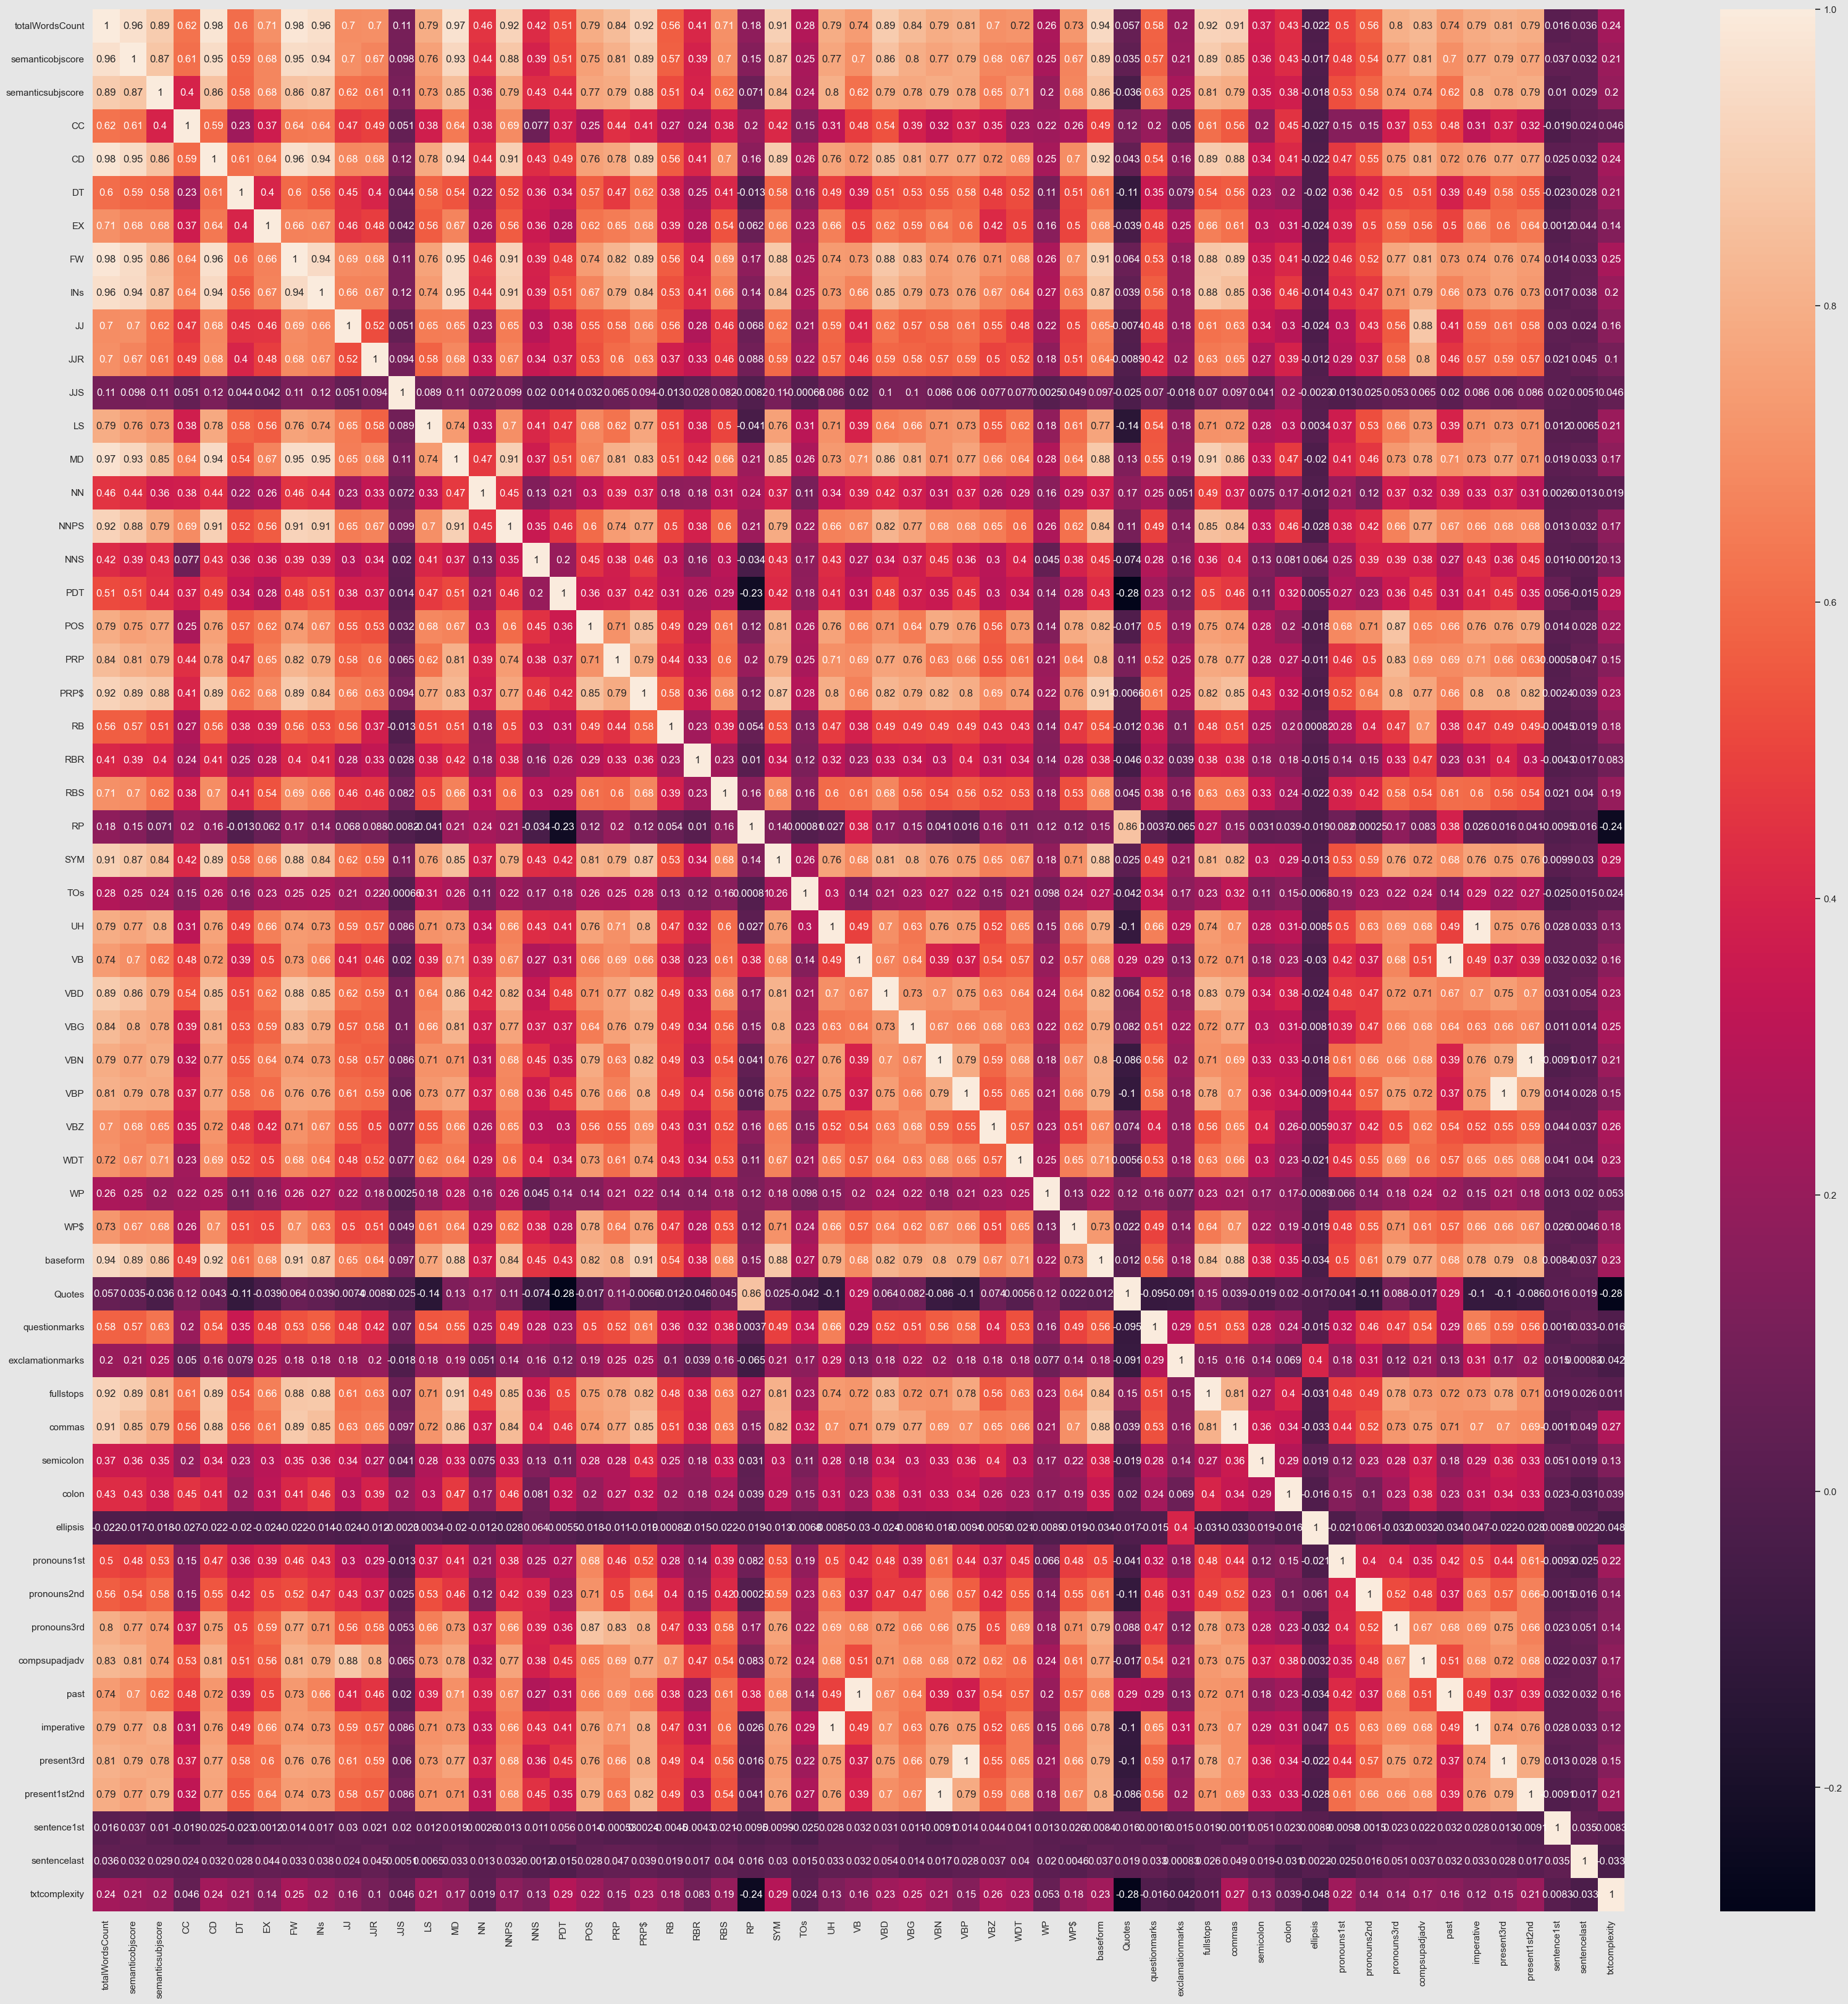

In [484]:
correlation_matrix = data_set.corr()
coor_features = correlation_matrix.index

plt.figure(figsize=(40,40))

heat_map= sb.heatmap(data_set[coor_features].corr(),annot=True)


dropping features with high correlation

In [485]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool)) 


C:\Users\mqstm\AppData\Local\Temp\ipykernel_11416\303308982.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


#### Select features to drop
NOTA: alterar o valor de correlaçao e dps comparar os resultados(0.7, 0.8, 0.95)

In [486]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['semanticobjscore', 'semanticsubjscore', 'CD', 'FW', 'INs', 'MD', 'NNPS', 'PRP', 'PRP$', 'SYM', 'VBD', 'VBG', 'VBN', 'VBP', 'baseform', 'Quotes', 'fullstops', 'commas', 'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd', 'present1st2nd']


#### Removing features from data set

In [487]:
data_set=data_set.drop(to_drop, axis=1)

In [488]:
pd.set_option('display.max_columns', None)
data_set.head()

,TextID,URL,Label,totalWordsCount,CC,DT,EX,JJ,JJR,JJS,LS,NN,NNS,PDT,POS,RB,RBR,RBS,RP,TOs,UH,VB,VBZ,WDT,WP,WP$,questionmarks,exclamationmarks,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109,7,0,5,0,0,0,0,0,0,0,1,0,0,2,0,0,0,11,0,1,0,1,0,0,0,0,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309,1,1,4,0,0,0,2,1,0,0,7,0,0,0,1,0,0,13,0,0,0,3,0,0,0,5,0,1,0,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149,8,0,5,0,0,0,0,1,0,0,4,0,0,1,0,0,0,8,0,0,0,2,0,0,0,0,0,0,0,1,1,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305,7,0,10,1,1,0,0,2,0,0,6,1,0,1,2,0,1,13,1,1,0,1,0,0,0,0,0,0,0,1,1,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491,33,0,12,0,1,0,2,1,0,0,7,1,0,1,0,0,1,34,0,3,0,1,0,0,0,0,0,0,0,1,1,24


### Preparing the data

In [489]:
from sklearn.preprocessing import LabelEncoder

columns = list(data_set.columns.values)

# remover Label
columns = [ c for c in columns if c not in ["TextID","URL","Label"]]
c=["CC","EX","LS","NNS","PDT","RBR","RP","TOs","UH","VBZ","WDT","questionmarks","exclamationmarks","colon","pronouns2nd","txtcomplexity","pronouns1st"]
X = data_set[columns]

y = data_set["Label"]

#print(y)
#print(X)
#print(X.shape, Y.shape)

# Convert string labels to numeric representation(objective -> 0 subjective -> 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#print(y)

In [490]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
print(X_train.shape, y_train.shape)



(200, 33) (200,)


Number of objective articles:  129 and number of subjective articles: 71
Number of objective articles using under sample: 71 Number of subjective articles using under sample: 71


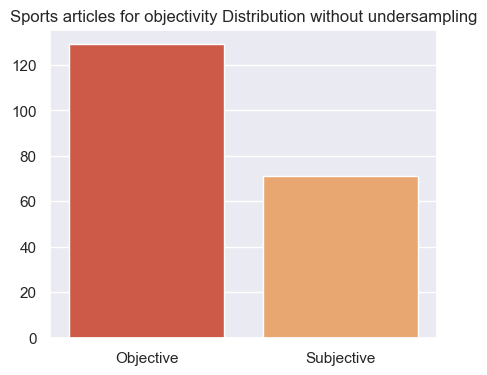

In [491]:
from imblearn.under_sampling import NearMiss

# Perform NearMiss undersampling
nm = NearMiss(sampling_strategy='auto', version=1)
X_undersampled, y_undersampled = nm.fit_resample(X_train, y_train)

underSample_objective = y_undersampled[y_undersampled == 0]
underSample_subjective = y_undersampled[y_undersampled == 1]

old_objective = y_train[y_train == 0]
old_subjective = y_train[y_train == 1]

print("Number of objective articles: ", len(old_objective),"and number of subjective articles:", len(old_subjective))
print("Number of objective articles using under sample:", len(underSample_objective),"Number of subjective articles using under sample:", len(underSample_subjective))

# Print plot
sb.set_style('darkgrid')
x = ['Objective', 'Subjective']
y = [len(old_objective), len(old_subjective)]
sb.barplot(x=x, y=y).set(title="Sports articles for objectivity Distribution without undersampling")
plt.show()


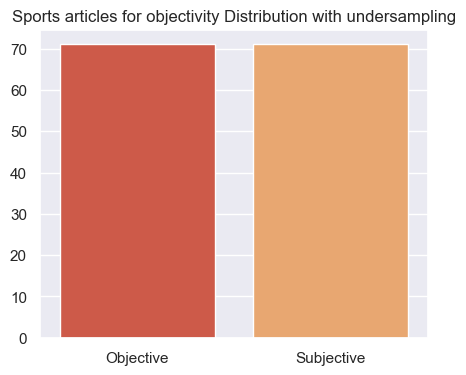

In [492]:
# Print plot
x = ['Objective', 'Subjective']
y = [len(underSample_objective), len(underSample_subjective)]

sb.barplot(x=x, y=y).set(title="Sports articles for objectivity Distribution with undersampling")
plt.show()


# Training models

The models that we will be using are the following:

1. Decision Tree
2. K-NN
3. SVM

In [493]:
# Print evaluation metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def print_evaluation(y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    print("Accuracy:{: ,.2f} %".format(accuracy_score(y_test, y_pred)*100))
    print("Precision:{: ,.2f} %".format(precision_score(y_test, y_pred)*100))
    print("Recall:{: ,.2f} %".format(recall_score(y_test, y_pred)*100))
    print("F1-score:{: ,.2f} %".format(f1_score(y_test, y_pred)*100))

def print_confusion_matrix(y_test, y_pred, model):
    matrix = confusion_matrix(y_test, y_pred)
    sb.set(rc={"figure.figsize":(3, 2), 'axes.facecolor':'#2b2b2b', 'figure.facecolor':'#e6e6e6', 'grid.color': '#5c5c5c'})
    sb.set_palette("RdYlGn", 6)
    ax = sb.heatmap(matrix, annot=True, fmt='d', cmap='YlOrRd', linewidths=5, linecolor='#2b2b2b')

    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted")
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])

    # set y-axis label and ticks
    ax.set_ylabel("Actual")
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])

    # set plot title
    ax.set_title("Confusion Matrix for the " + model)

    plt.show()

def print_evaluation_plot(y_test, y_pred, model):
    x = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    y = [(accuracy_score(y_test, y_pred)*100), (precision_score(y_test, y_pred)*100), (recall_score(y_test, y_pred)*100), (f1_score(y_test, y_pred)*100)]

    sb.set(rc={"figure.figsize":(5, 4), 'axes.facecolor':'#2b2b2b', 'figure.facecolor':'#e6e6e6', 'grid.color': '#5c5c5c'})
    sb.set_palette("RdYlGn", 6)
    plot = sb.barplot(x=x, y=y)
    plt.ylim(0, 100)
    ax = sb.countplot(x=y)
    sb.barplot(x=x, y=y, edgecolor="black")
    plt.bar_label(ax.containers[0], label_type='center', fmt='%.2f%%')
    plot.set(title="Evaluation metrics for the " + model, ylabel="%")
    for _,s in ax.spines.items():
        s.set_color('black')
    
    plt.show()

## Decision Tree



Balanced Dataset using under sample

In [494]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_undersampled, y_undersampled)

y_pred = decision_tree_classifier.predict(X_test)

features_importance = decision_tree_classifier.feature_importances_

print("- Features' importance -")
for i in range(0, len(X_train.columns)):
    if features_importance[i] > 0:
        print(X_train.columns[i] + ": " + str(features_importance[i]))

balanced_accuracy_decision_tree = accuracy_score(y_test, y_pred)*100
balanced_precision_decision_tree = precision_score(y_test, y_pred)*100
balanced_recall_decision_tree = recall_score(y_test, y_pred)*100
balanced_f1_decision_tree = f1_score(y_test, y_pred)*100


- Features' importance -
totalWordsCount: 0.41941123461893653
CC: 0.014084507042253521
DT: 0.02464788732394366
EX: 0.03197113716783464
JJR: 0.04225352112676056
LS: 0.07082342518257685
RBR: 0.0544809598330725
RBS: 0.048457411133467465
TOs: 0.02347417840375587
UH: 0.07994885677279674
VB: 0.014084507042253521
VBZ: 0.02393428934161532
WDT: 0.03380281690140845
WP$: 0.011643937700275778
questionmarks: 0.024789085389530112
exclamationmarks: 0.02312295749952673
pronouns1st: 0.02347417840375587
pronouns2nd: 0.032112676056338045
txtcomplexity: 0.003482433059897883


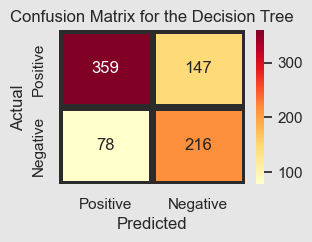

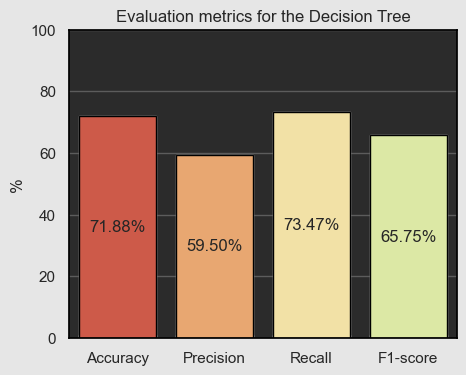

In [495]:
print_confusion_matrix(y_test, y_pred, "Decision Tree")
print_evaluation_plot(y_test, y_pred, "Decision Tree")

Imbalanced dataset

In [496]:
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

features_importance = decision_tree_classifier.feature_importances_

print("- Features' importance -")
for i in range(0, len(X_train.columns)):
    if features_importance[i] > 0:
        print(X_train.columns[i] + ": " + str(features_importance[i]))

imbalanced_accuracy_decision_tree = accuracy_score(y_test, y_pred)*100
imbalanced_precision_decision_tree = precision_score(y_test, y_pred)*100
imbalanced_recall_decision_tree = recall_score(y_test, y_pred)*100
imbalanced_f1_decision_tree = f1_score(y_test, y_pred)*100

- Features' importance -
totalWordsCount: 0.029115260035666196
CC: 0.06023717211178448
EX: 0.0556829348182116
JJ: 0.028595344677886443
POS: 0.05624538870526425
UH: 0.0436728900534993
VB: 0.0759039937070175
WDT: 0.02660415369226366
WP$: 0.03527127911235625
questionmarks: 0.1479066880077413
exclamationmarks: 0.01988732511403429
semicolon: 0.01654276138390125
colon: 0.0065412208035388305
pronouns1st: 0.057623952153922686
pronouns2nd: 0.33681018254187356
txtcomplexity: 0.003359453081038454


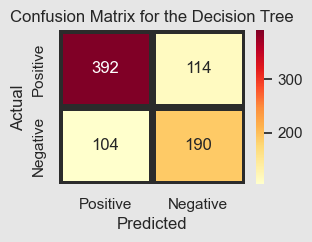

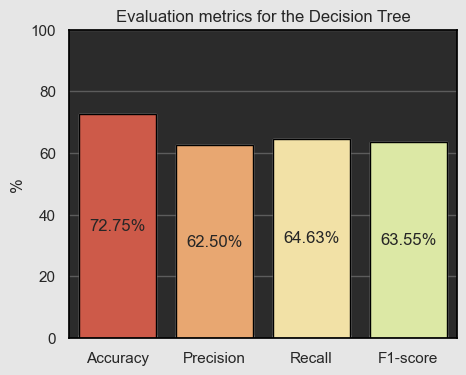

In [497]:
print_confusion_matrix(y_test, y_pred, "Decision Tree")
print_evaluation_plot(y_test, y_pred, "Decision Tree")

## K-NN

Balanced dataset


Imbalanced dataset

## SVM

Balanced dataset

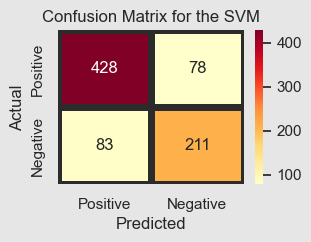

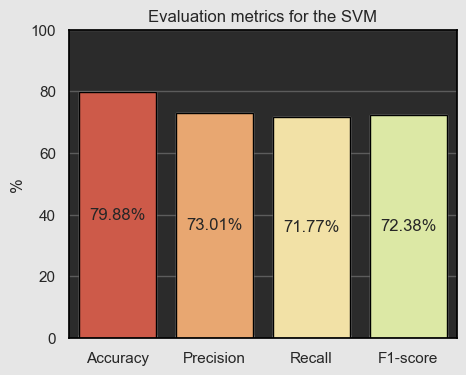

In [498]:
from sklearn import svm

clf = svm.SVC(kernel ='linear')

clf.fit(X_undersampled, y_undersampled)

y_pred = clf.predict(X_test)

balanced_accuracy_svm = accuracy_score(y_test, y_pred)*100
balanced_precision_svm = precision_score(y_test, y_pred)*100
balanced_recall_svm = recall_score(y_test, y_pred)*100
balanced_f1_svm = f1_score(y_test, y_pred)*100

print_confusion_matrix(y_test, y_pred, "SVM")
print_evaluation_plot(y_test, y_pred, "SVM")

Imbalanced dataset

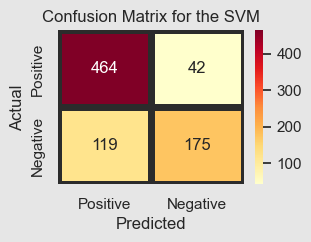

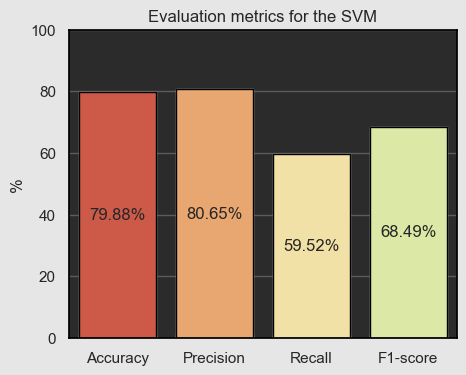

In [499]:
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

imbalanced_accuracy_svm = accuracy_score(y_test, y_pred)*100
imbalanced_precision_svm = precision_score(y_test, y_pred)*100
imbalanced_recall_svm = recall_score(y_test, y_pred)*100
imbalanced_f1_svm = f1_score(y_test, y_pred)*100

print_confusion_matrix(y_test, y_pred, "SVM")
print_evaluation_plot(y_test, y_pred, "SVM")

# Comparing the models

Balanced dataset

Balanced dataset

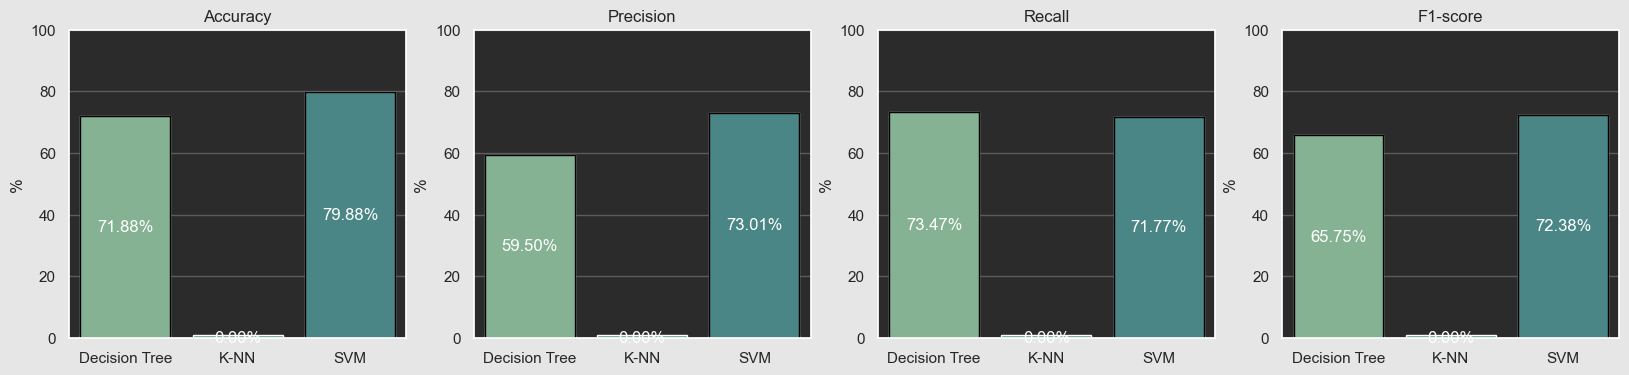


Imbalanced dataset


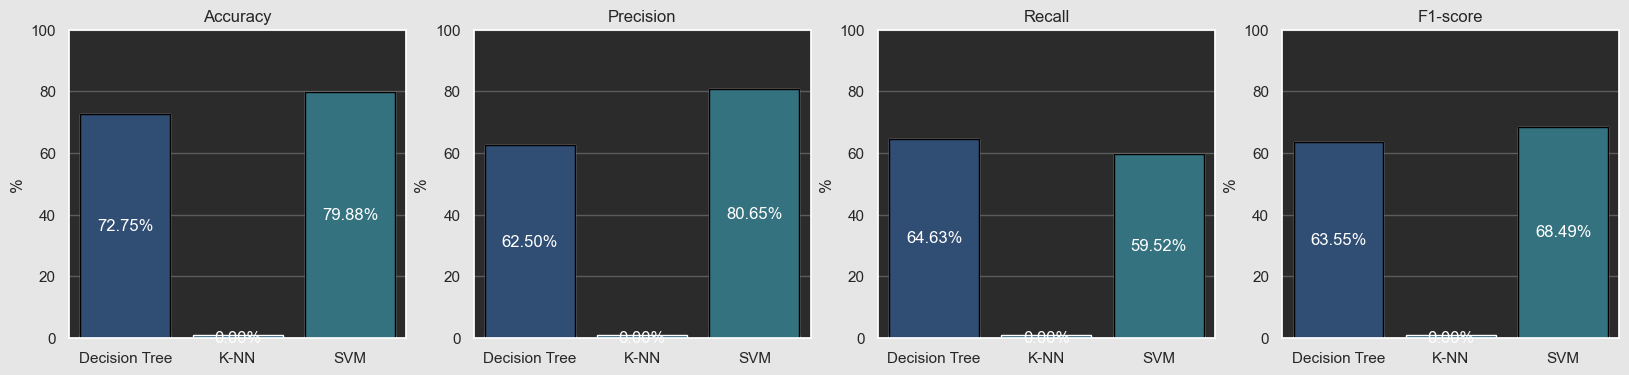

In [597]:
# BALANCED DATASET
print("\n\nBalanced dataset")

models = ["Decision Tree", "K-NN", "SVM"]
balanced_accuracy = [balanced_accuracy_decision_tree, 0, balanced_accuracy_svm]
balanced_precision = [balanced_precision_decision_tree, 0, balanced_precision_svm]
balanced_recall = [balanced_recall_decision_tree, 0, balanced_recall_svm]
balanced_f1 = [balanced_f1_decision_tree, 0, balanced_f1_svm]

sb.set(rc={'axes.facecolor':'#2b2b2b', 'figure.facecolor':'#e6e6e6', 'grid.color': '#5c5c5c'})
sb.set_palette("crest")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,4))
# Accuracy
plot = sb.barplot(x=models, y=balanced_accuracy, ax=ax1)
plot.set(ylim=(0, 100))
a1 = sb.countplot(x=balanced_accuracy, ax=ax1)
a1.bar_label(a1.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=balanced_accuracy, ax=ax1, edgecolor="black")
plot.set(title="Accuracy", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# Precision
plot = sb.barplot(x=models, y=balanced_precision, ax=ax2)
plot.set(ylim=(0, 100))
a2 = sb.countplot(x=balanced_precision, ax=ax2)
a2.bar_label(a2.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=balanced_precision, ax=ax2, edgecolor="black")
plot.set(title="Precision", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# Recall
plot = sb.barplot(x=models, y=balanced_recall, ax=ax3)
plot.set(ylim=(0, 100))
a3 = sb.countplot(x=balanced_recall, ax=ax3)
a3.bar_label(a3.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=balanced_recall, ax=ax3, edgecolor="black")
plot.set(title="Recall", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# F1
plot = sb.barplot(x=models, y=balanced_f1, ax=ax4)
plot.set(ylim=(0, 100))
a4 = sb.countplot(x=balanced_f1, ax=ax4)
a4.bar_label(a4.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=balanced_f1, ax=ax4, edgecolor="black")
plot.set(title="F1-score", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

plt.show()

# IMBALANCED DATASET
print("\nImbalanced dataset")

models = ["Decision Tree", "K-NN", "SVM"]
imbalanced_accuracy = [imbalanced_accuracy_decision_tree, 0, imbalanced_accuracy_svm]
imbalanced_precision = [imbalanced_precision_decision_tree, 0, imbalanced_precision_svm]
imbalanced_recall = [imbalanced_recall_decision_tree, 0, imbalanced_recall_svm]
imbalanced_f1 = [imbalanced_f1_decision_tree, 0, imbalanced_f1_svm]

sb.set(rc={'axes.facecolor':'#2b2b2b', 'figure.facecolor':'#e6e6e6', 'grid.color': '#5c5c5c'})
sb.set_palette("crest_r")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,4))
# Accuracy
plot = sb.barplot(x=models, y=imbalanced_accuracy, ax=ax1)
plot.set(ylim=(0, 100))
a1 = sb.countplot(x=imbalanced_accuracy, ax=ax1)
a1.bar_label(a1.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=imbalanced_accuracy, ax=ax1, edgecolor="black")
plot.set(title="Accuracy", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# Precision
plot = sb.barplot(x=models, y=imbalanced_precision, ax=ax2)
plot.set(ylim=(0, 100))
a2 = sb.countplot(x=imbalanced_precision, ax=ax2)
a2.bar_label(a2.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=imbalanced_precision, ax=ax2, edgecolor="black")
plot.set(title="Precision", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# Recall
plot = sb.barplot(x=models, y=imbalanced_recall, ax=ax3)
plot.set(ylim=(0, 100))
a3 = sb.countplot(x=imbalanced_recall, ax=ax3)
a3.bar_label(a3.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=imbalanced_recall, ax=ax3, edgecolor="black")
plot.set(title="Recall", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

# F1
plot = sb.barplot(x=models, y=imbalanced_f1, ax=ax4)
plot.set(ylim=(0, 100))
a4 = sb.countplot(x=imbalanced_f1, ax=ax4)
a4.bar_label(a4.containers[0], label_type='center', fmt='%.2f%%', color="white")
sb.barplot(x=models, y=imbalanced_f1, ax=ax4, edgecolor="black")
plot.set(title="F1-score", ylabel="%")
for _,s in ax.spines.items():
    s.set_color('black')

plt.show()

Imbalanced dataset